In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Before managing missing data

In [4]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot: xlabel='species', ylabel='count'>

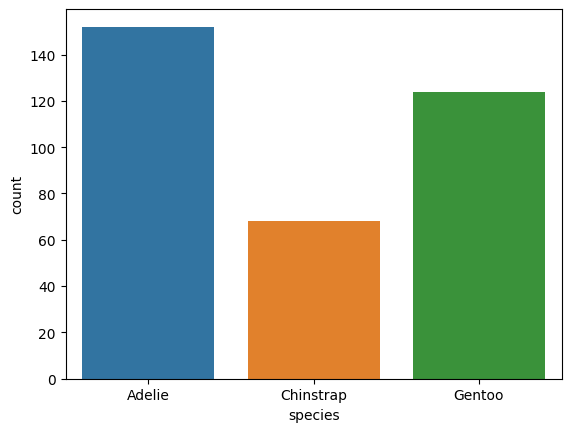

In [5]:
sns.countplot(data=df,x="species")

In [ ]:
# Manage Missing data

In [7]:
# find qty of missing data
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df_temp = df.dropna()

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
len(df_temp)

334

In [11]:
len(df)

344

In [12]:
# Calculate precent of missing data
100*((len(df)-len(df_temp))/len(df))

2.9069767441860463

In [14]:
df[df["sex"].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We shall drop these 10 lines of the data

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


<AxesSubplot: xlabel='species', ylabel='count'>

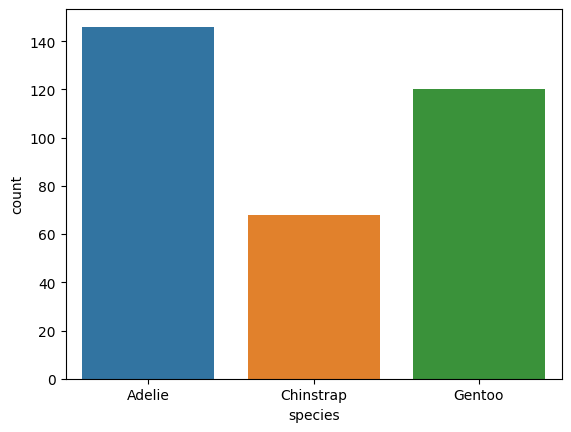

In [17]:
sns.countplot(data=df,x="species")

<AxesSubplot: xlabel='island', ylabel='count'>

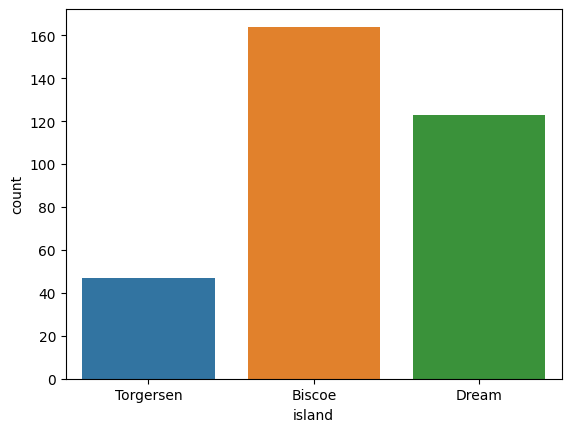

In [18]:
sns.countplot(data=df,x="island")

<AxesSubplot: xlabel='sex', ylabel='count'>

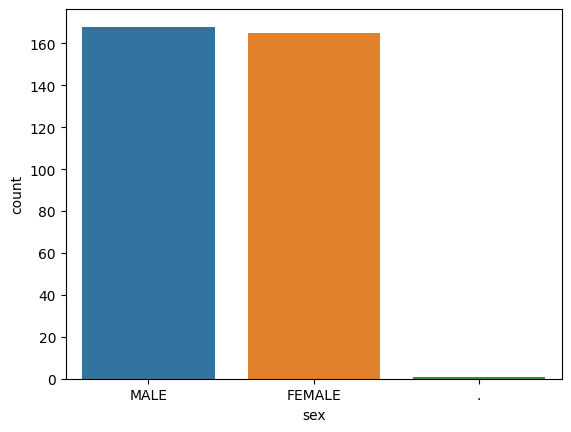

In [19]:
sns.countplot(data=df,x="sex")

In [20]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [24]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [25]:
# We should find which line has this "."

df[df['sex']=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# Let's discuss how to find the sex of this penguin in line#336

In [26]:
df[df["species"]=='Gentoo'].groupby('sex').describe()

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
.                   1.0  44.500000       NaN  44.5  44.50  44.5  44.500  44.5   
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
.                  1.0  15.700000  ...             217.0  217.0         1.0   
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
.       4875.000000         NaN  4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 32 columns]

In [27]:
df[df["species"]=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [28]:
# We found that from describe statistics that the features values match female 2 times than male so we gonna have this line as female
df.at[336,'sex'] = "FEMALE"

<AxesSubplot: xlabel='sex', ylabel='count'>

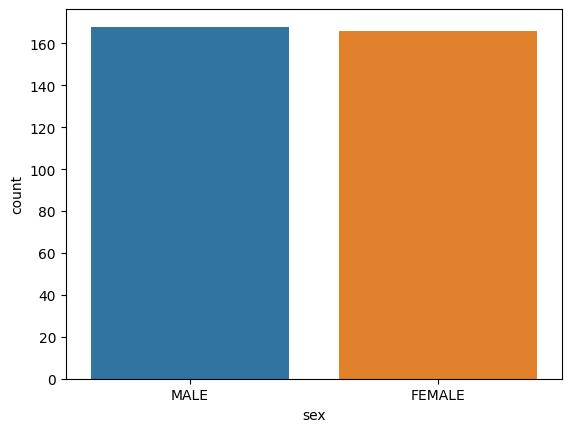

In [29]:
sns.countplot(data=df,x="sex")

In [30]:
df['sex'].value_counts()

MALE      168
FEMALE    166
Name: sex, dtype: int64

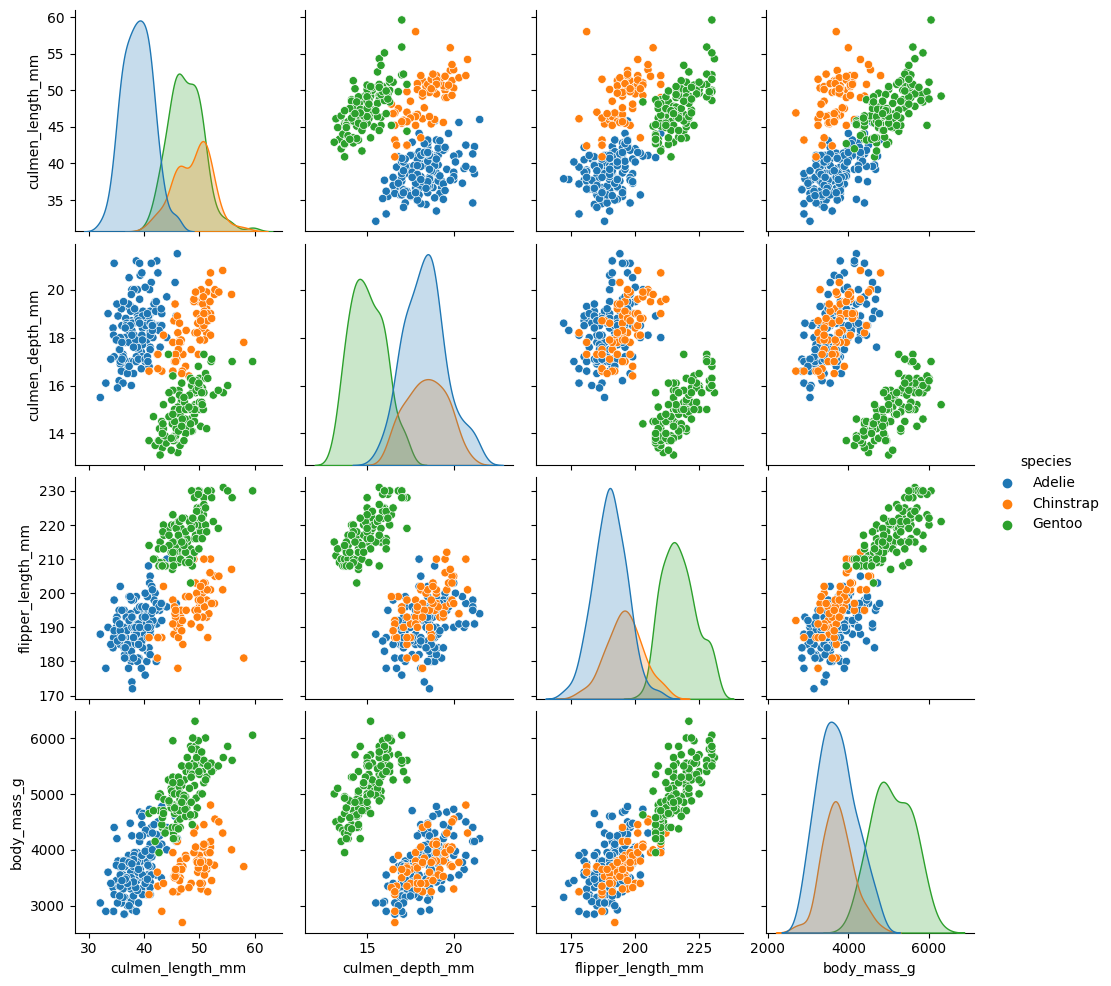

In [31]:
sns.pairplot(data=df,
             hue="species")

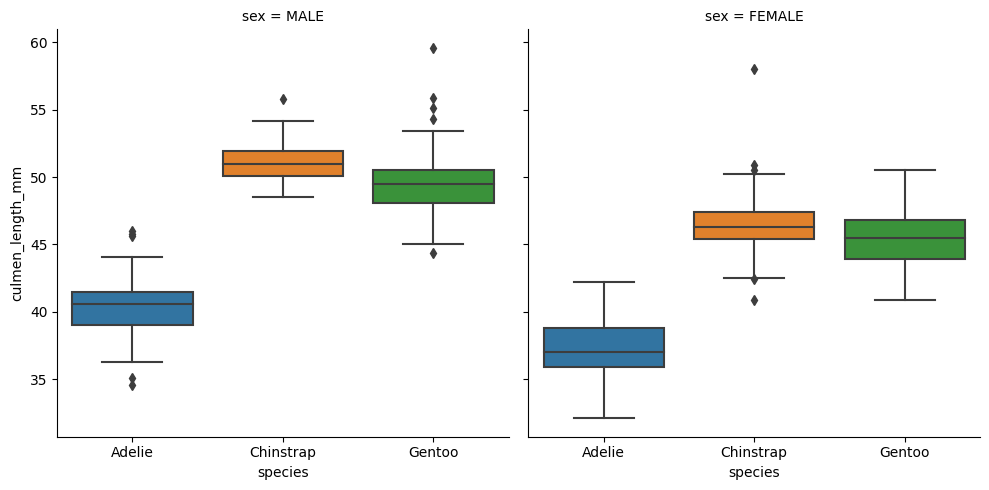

In [32]:
sns.catplot(data=df,
            x="species",
            y="culmen_length_mm",
            kind="box",
            col="sex")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.0+ KB


In [34]:
y = df['species']
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)

In [38]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [39]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [ ]:
# Based on theory and how we calculate our Gini impurity as sum(Pc*(1-pc)) so we can drop scaling of this data
# when building a tree based model.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [43]:
# Default Classifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [47]:
# Evaluation

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



In [48]:
confusion_matrix(y_test,y_pred)

array([[40,  1,  0],
       [ 2, 21,  0],
       [ 0,  0, 37]], dtype=int64)

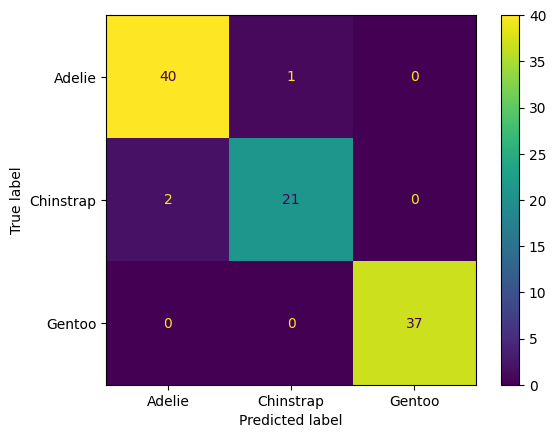

In [50]:
plotting_conf_matrix = ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [51]:
model.feature_importances_

array([0.32591819, 0.05221421, 0.542054  , 0.        , 0.0681854 ,
       0.        , 0.0116282 ])

In [52]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [54]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
             columns=["Feature Importance"]).sort_values("Feature Importance")

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.011628
culmen_depth_mm,0.052214
island_Dream,0.068185
culmen_length_mm,0.325918
flipper_length_mm,0.542054


In [58]:
len(X_train)

233

In [64]:
105+45+83

233

In [65]:
147+86

233

In [68]:
y_train.unique()

array(['Chinstrap', 'Adelie', 'Gentoo'], dtype=object)

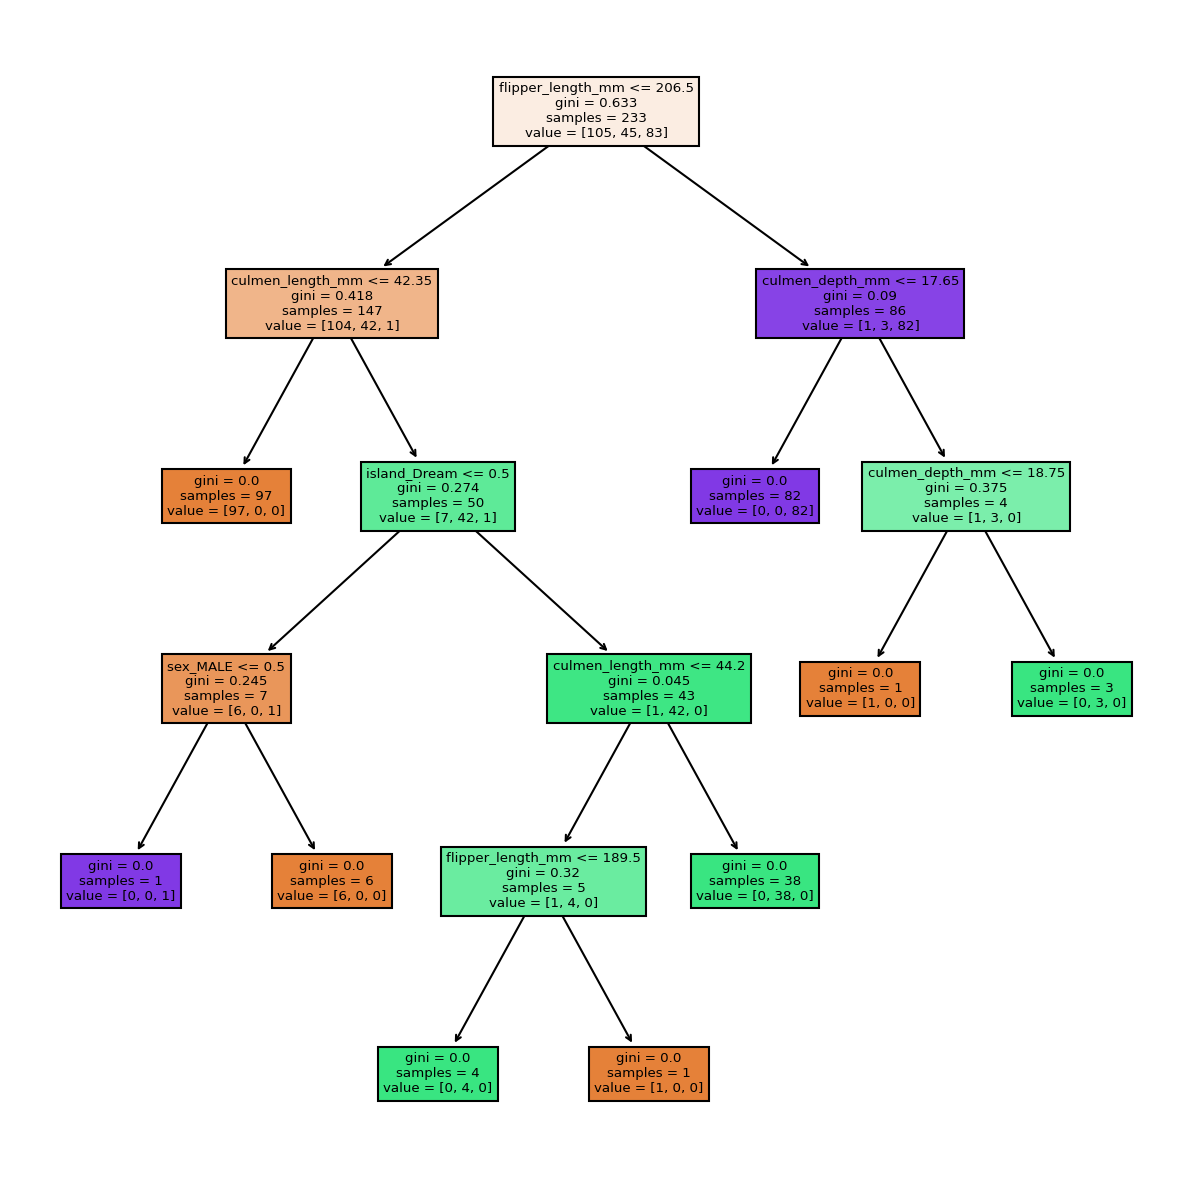

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=150)
plot_tree(model,feature_names=X.columns,filled=True);

In [69]:
def report_tree_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test,model_pred))
    print("\n")
    plt.figure(figsize=(10,10), dpi=150)
    plot_tree(model,feature_names=X.columns,filled=True);

In [70]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





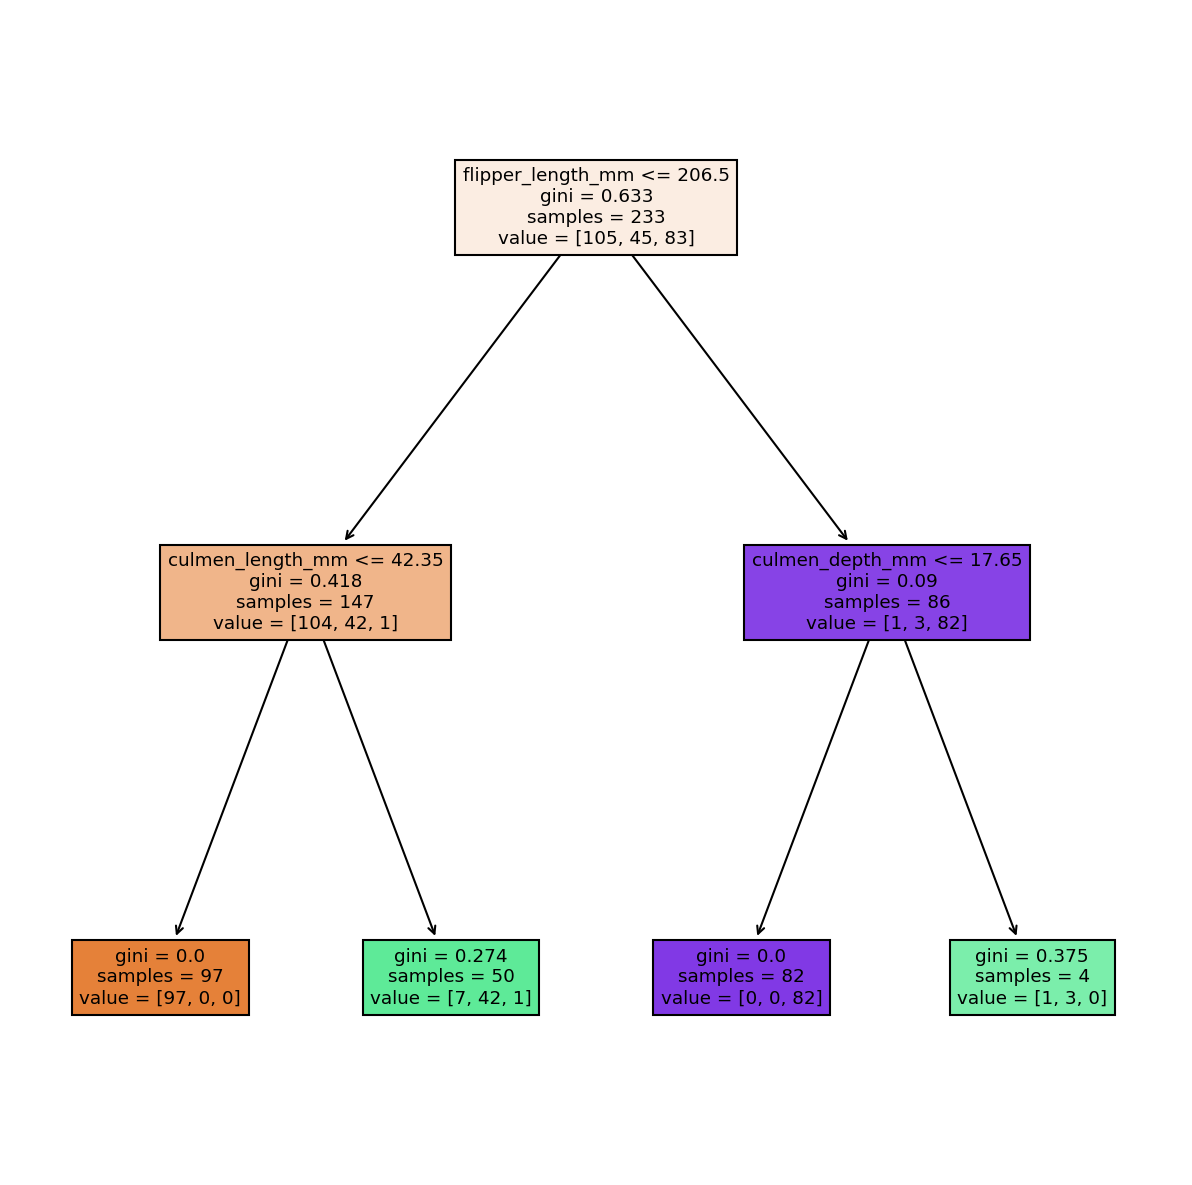

In [71]:
report_tree_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





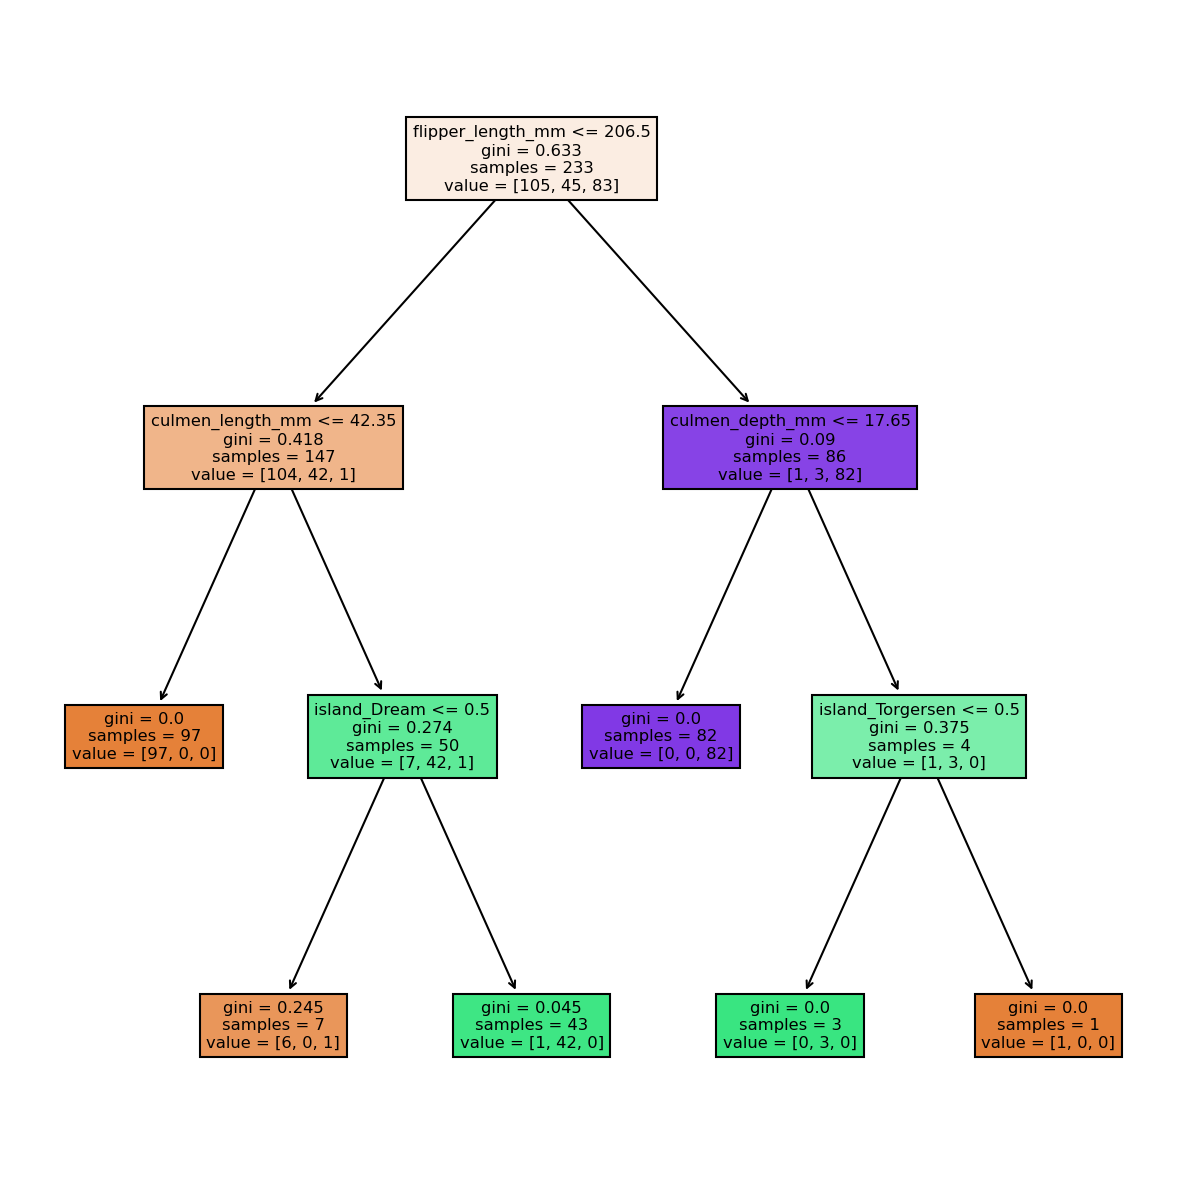

In [72]:
pruned_tree_3 = DecisionTreeClassifier(max_depth=3)
pruned_tree_3.fit(X_train,y_train)
report_tree_model(pruned_tree_3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





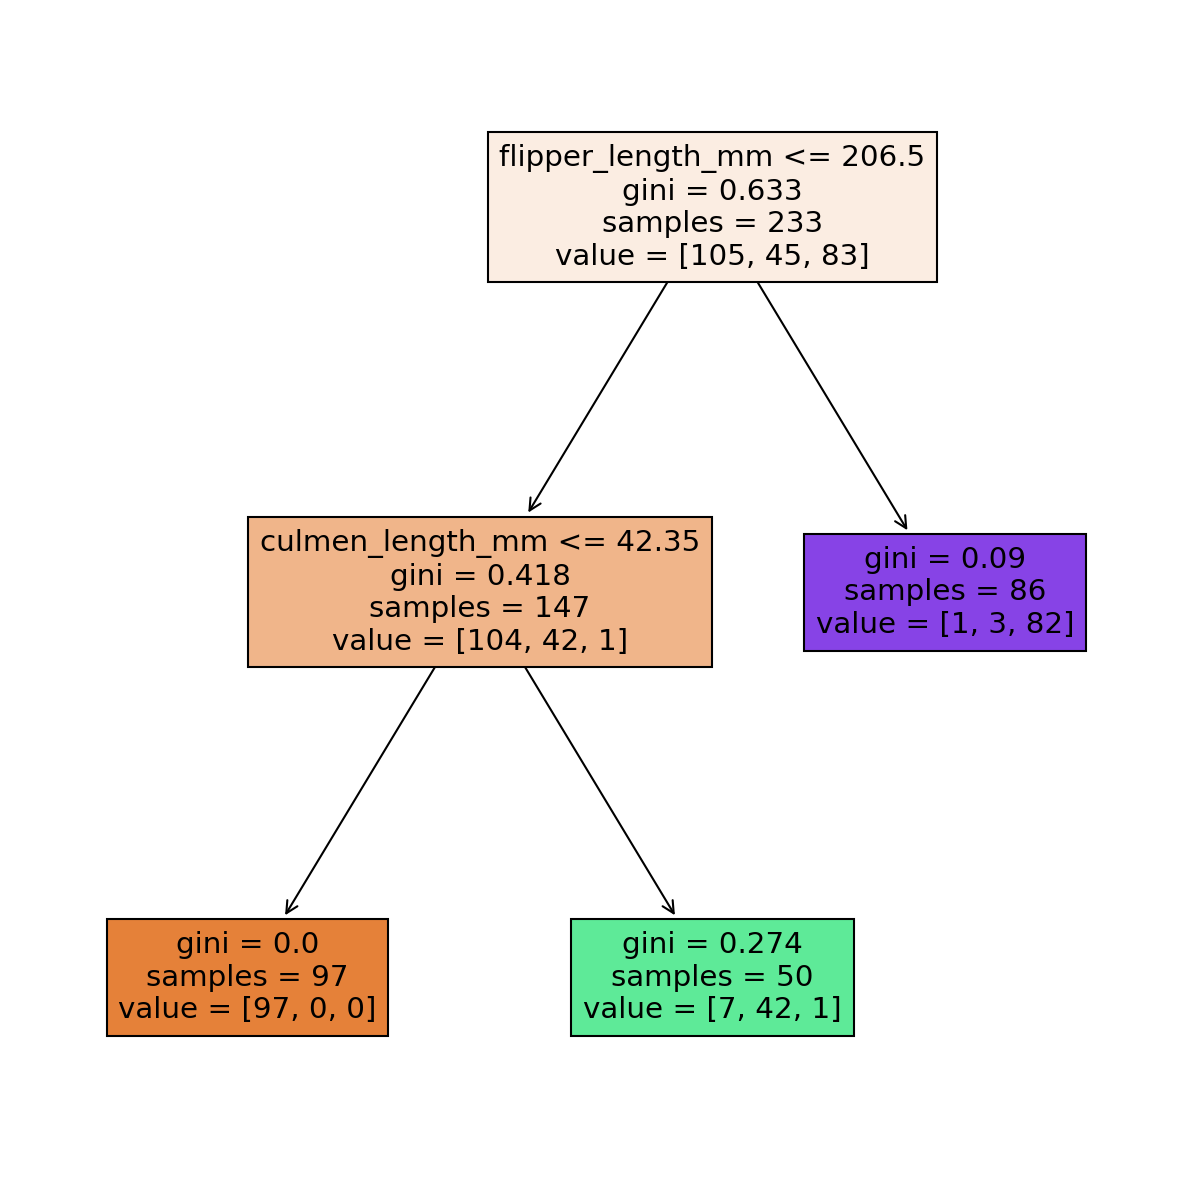

In [73]:
max_leaf_tree_3 = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_tree_3.fit(X_train,y_train)
report_tree_model(max_leaf_tree_3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





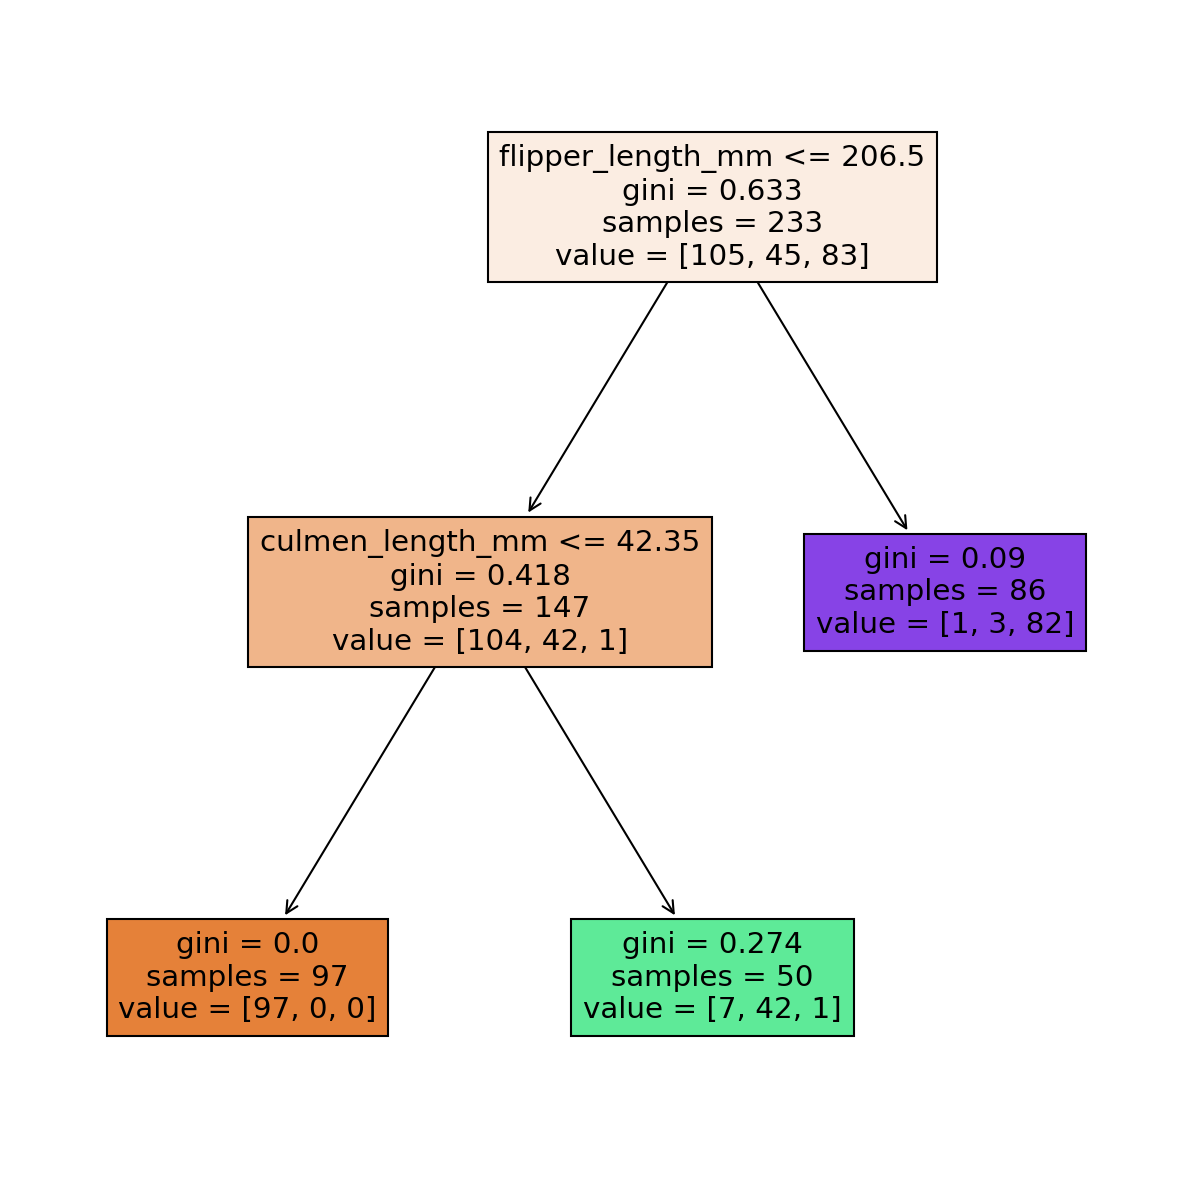

In [74]:
max_leaf_depth_tree_3_3 = DecisionTreeClassifier(max_leaf_nodes=3,max_depth=3)
max_leaf_depth_tree_3_3.fit(X_train,y_train)
report_tree_model(max_leaf_depth_tree_3_3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





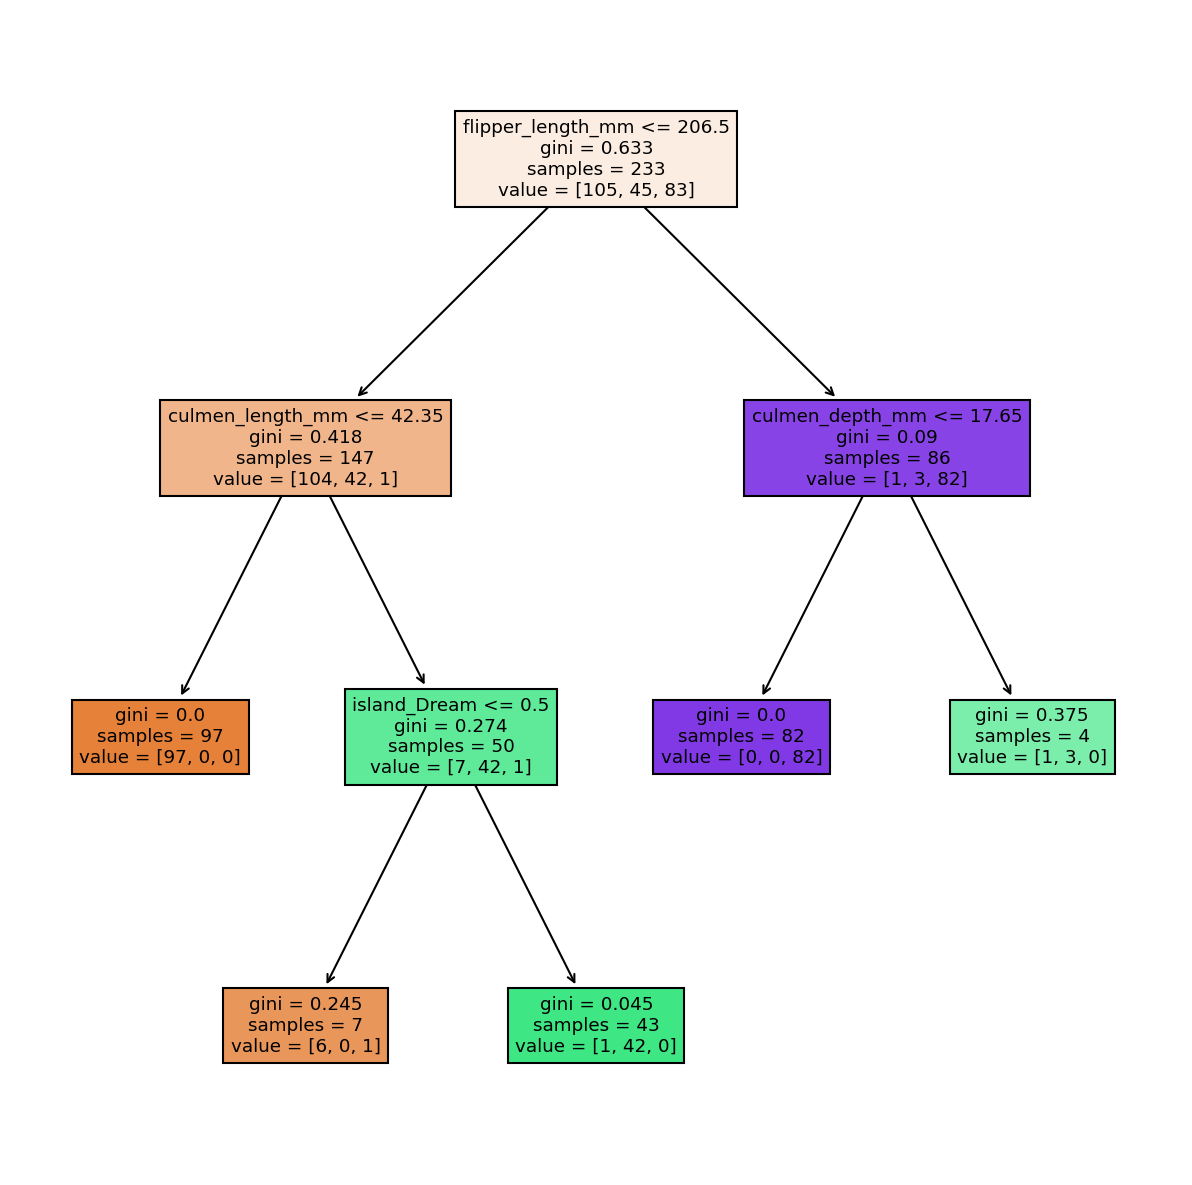

In [75]:
max_leaf_depth_tree_3_3 = DecisionTreeClassifier(max_leaf_nodes=5)
max_leaf_depth_tree_3_3.fit(X_train,y_train)
report_tree_model(max_leaf_depth_tree_3_3)

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





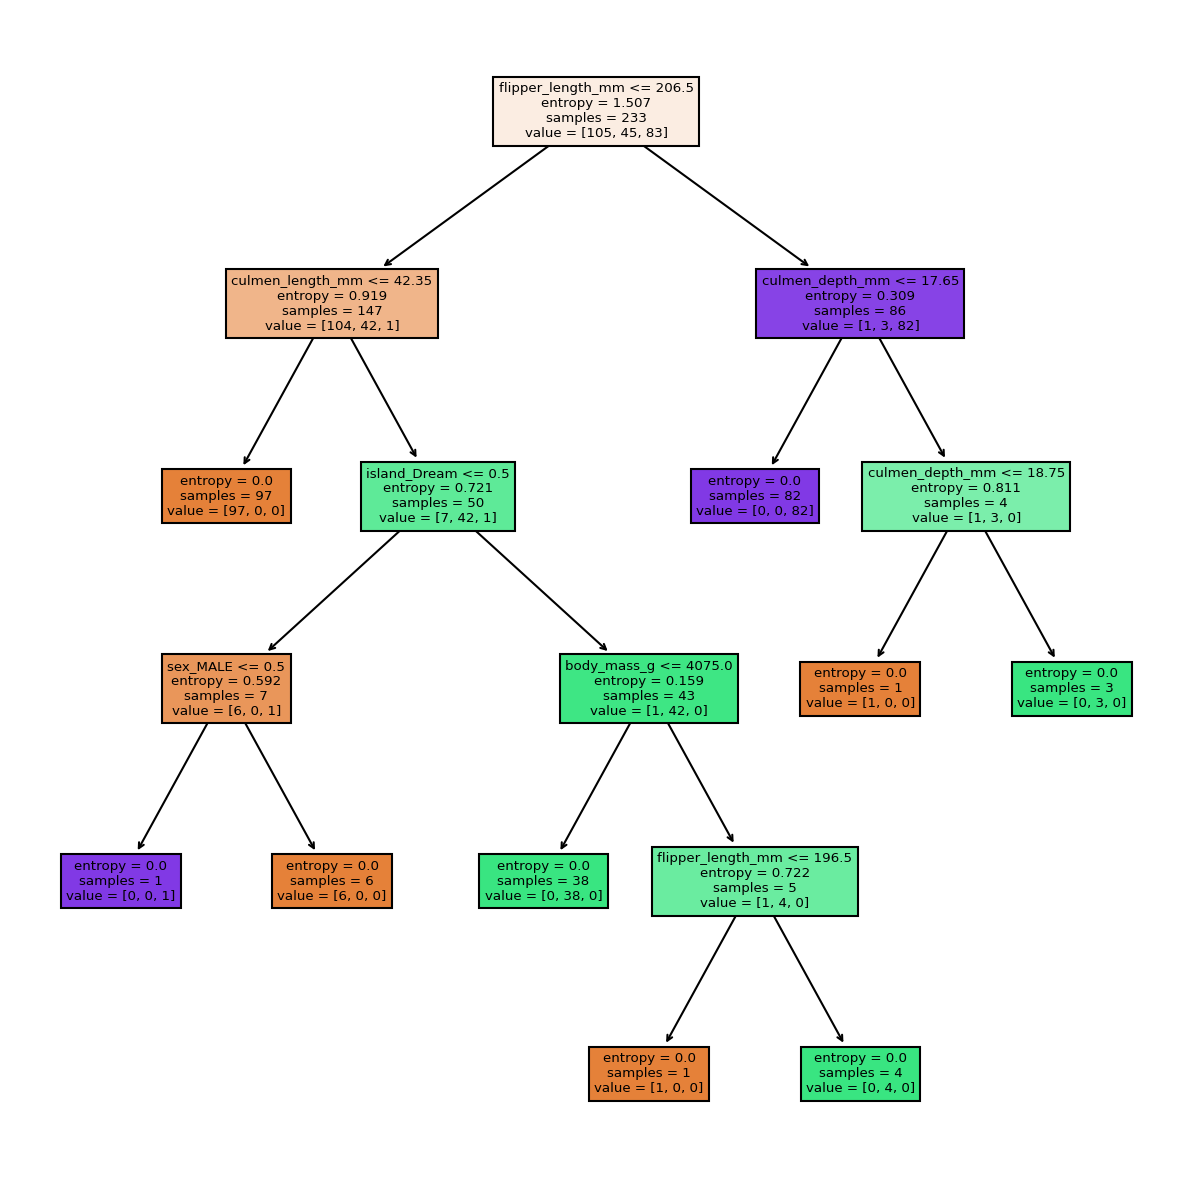

In [76]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(X_train,y_train)
report_tree_model(entropy_tree)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





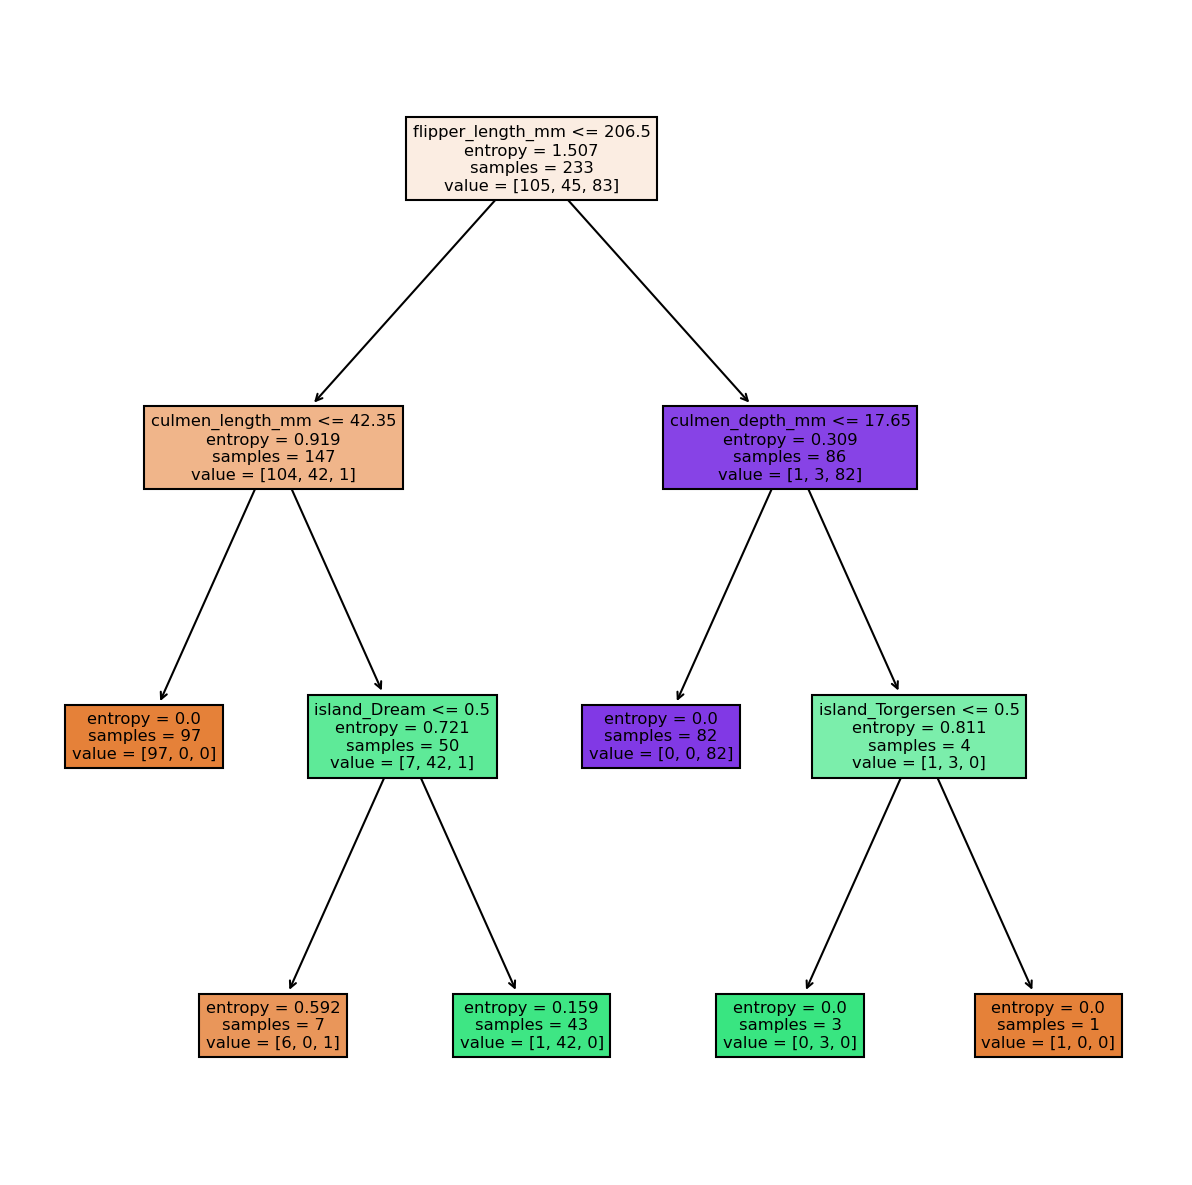

In [77]:
entropy_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
entropy_tree.fit(X_train,y_train)
report_tree_model(entropy_tree)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





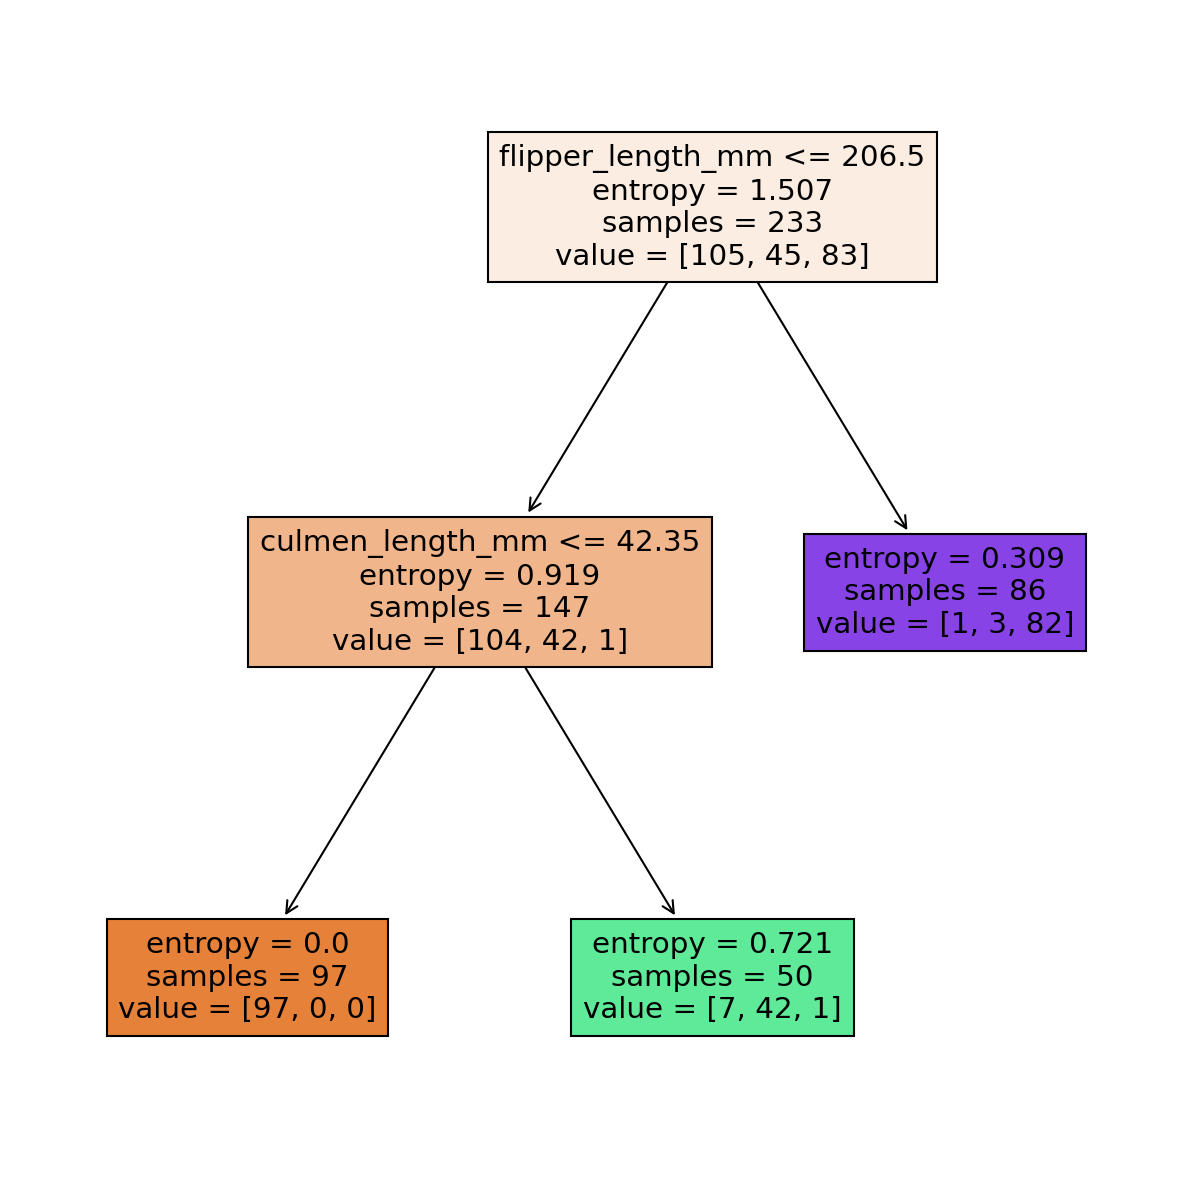

In [78]:
entropy_tree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=3)
entropy_tree.fit(X_train,y_train)
report_tree_model(entropy_tree)